<a href="https://colab.research.google.com/github/charlie-aashutosh/NOKIA-Code_files/blob/main/Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
customers_df = pd.read_csv("/content/Customers.csv")
network_slicing_df = pd.read_csv("/content/network_slicing_recognition.csv")


# Display basic information about each dataset
customers_info = customers_df.info()
network_slicing_info = network_slicing_df.info()

# Display the first few rows of each dataset
customers_head = customers_df.head()
network_slicing_head = network_slicing_df.head()

customers_info, customers_head, network_slicing_info, network_slicing_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    100 non-null    int64 
 1   customer_name  100 non-null    object
 2   phone_number   100 non-null    object
 3   email          100 non-null    object
 4   address        100 non-null    object
 5   signup_date    100 non-null    object
 6   status         100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31583 entries, 0 to 31582
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LTE/5g Category       31583 non-null  int64  
 1   Time                  31583 non-null  int64  
 2   Packet Loss Rate      31583 non-null  float64
 3   Packet delay          31583 non-null  int64  
 4   IoT                   31583 non-null  in

(None,
    customer_id      customer_name            phone_number  \
 0            1  Christopher Davis  001-909-343-1471x89751   
 1            2       Brent Wilson            765.243.0064   
 2            3     Alex Rodriguez      688.560.2602x38688   
 3            4     Craig Thompson                   -9168   
 4            5   Jeffrey Peck DDS              4896054222   
 
                                   email  \
 0                    jgalvan@warner.net   
 1                     erica23@gmail.com   
 2  christopherwinters@graham-jordan.net   
 3                shanewarren@moreno.com   
 4          avilachristopher@hotmail.com   
 
                                              address signup_date    status  
 0           7095 Russell Meadow\nSusanside, DE 92447  09-09-2024  inactive  
 1  283 Mitchell Drives Suite 906\nLake Cheryl, KS...  15-09-2022    active  
 2     4769 Mark River Apt. 868\nNorrisberg, NV 66117  10-03-2024  inactive  
 3                   PSC 9181, Box 0224\n

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ---------------- Customer Churn Prediction ----------------
# Preprocessing Customers Dataset
customers_df['signup_date'] = pd.to_datetime(customers_df['signup_date'], errors='coerce')
customers_df['days_since_signup'] = (pd.to_datetime('today') - customers_df['signup_date']).dt.days

# Encode target variable
label_encoder = LabelEncoder()
customers_df['status'] = label_encoder.fit_transform(customers_df['status'])  # Active = 0, Inactive = 1

# Select features and target
X_customers = customers_df[['days_since_signup']]
y_customers = customers_df['status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_customers, y_customers, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
accuracy_customers = accuracy_score(y_test, y_pred)
classification_rep_customers = classification_report(y_test, y_pred)
print("Customer Churn Prediction Model:")
print("Accuracy:", accuracy_customers)
print(classification_rep_customers)

Customer Churn Prediction Model:
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.40      0.86      0.55         7
           1       0.80      0.31      0.44        13

    accuracy                           0.50        20
   macro avg       0.60      0.58      0.49        20
weighted avg       0.66      0.50      0.48        20



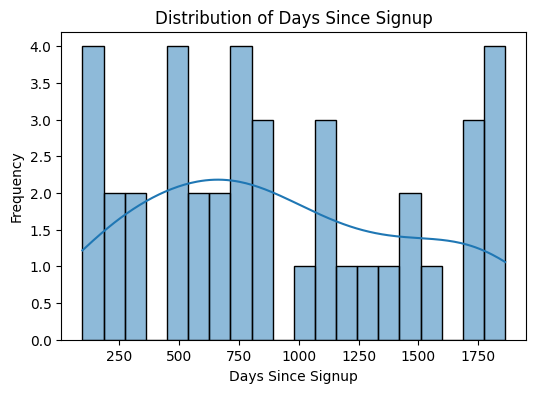

In [13]:
# Visualizations for Customer Churn KPIs
plt.figure(figsize=(6, 4))
sns.histplot(customers_df['days_since_signup'], bins=20, kde=True)
plt.title('Distribution of Days Since Signup')
plt.xlabel('Days Since Signup')
plt.ylabel('Frequency')
plt.show()

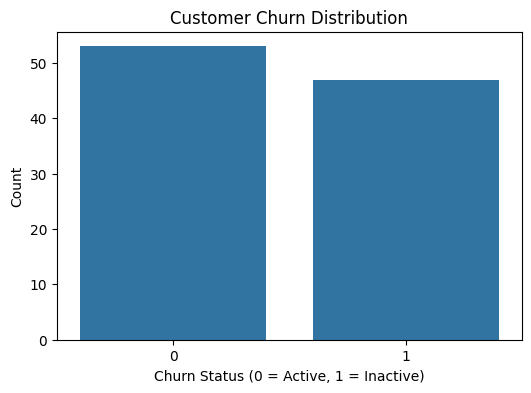

In [14]:
# Churn Rate Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=customers_df['status'])
plt.title('Customer Churn Distribution')
plt.xlabel('Churn Status (0 = Active, 1 = Inactive)')
plt.ylabel('Count')
plt.show()

In [15]:
network_slicing_df = pd.read_csv("/content/network_slicing_recognition.csv")

In [16]:
X_network = network_slicing_df.drop(columns=['slice Type'])
y_network = network_slicing_df['slice Type']

# Normalize features
scaler = StandardScaler()
X_network_scaled = scaler.fit_transform(X_network)

# Train-test split
X_train_net, X_test_net, y_train_net, y_test_net = train_test_split(X_network_scaled, y_network, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model_net = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_net.fit(X_train_net, y_train_net)

# Predictions
y_pred_net = rf_model_net.predict(X_test_net)

# Evaluation
accuracy_net = accuracy_score(y_test_net, y_pred_net)
classification_rep_net = classification_report(y_test_net, y_pred_net)
print("\nNetwork Slicing Recognition Model:")
print("Accuracy:", accuracy_net)
print(classification_rep_net)


Network Slicing Recognition Model:
Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3316
           2       1.00      1.00      1.00      1482
           3       1.00      1.00      1.00      1519

    accuracy                           1.00      6317
   macro avg       1.00      1.00      1.00      6317
weighted avg       1.00      1.00      1.00      6317



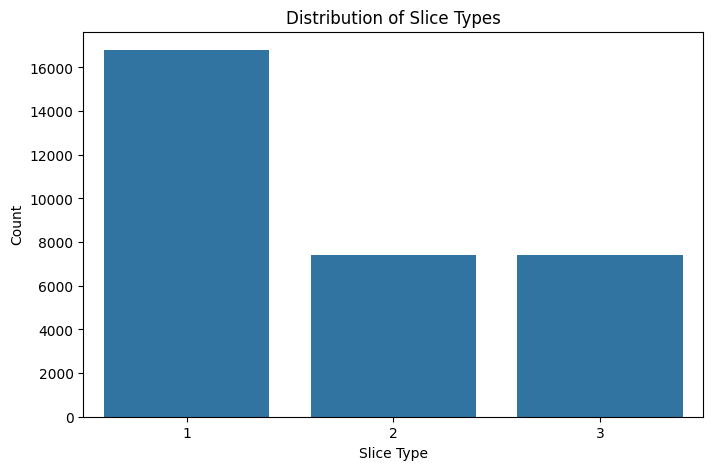

In [17]:
# Visualizations for Network Slicing KPIs
plt.figure(figsize=(8, 5))
sns.countplot(x=y_network)
plt.title('Distribution of Slice Types')
plt.xlabel('Slice Type')
plt.ylabel('Count')
plt.show()

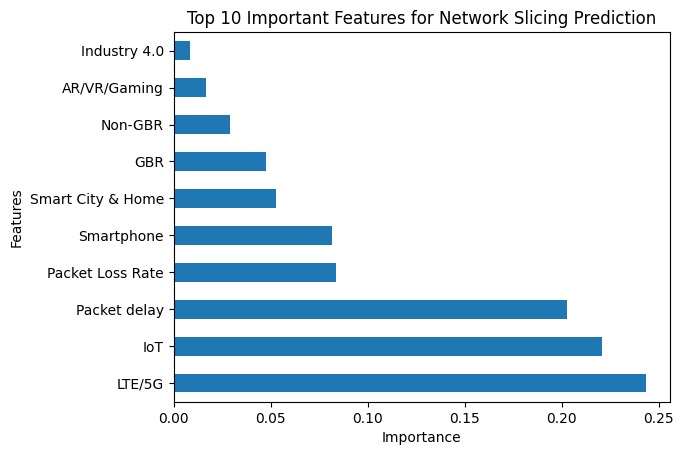

In [18]:
# Feature Importance Visualization
feature_importances = pd.Series(rf_model_net.feature_importances_, index=X_network.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features for Network Slicing Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()